In [70]:
# importing the libraries required
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import numpy as np # linear algebra
import seaborn as sns # data visualization 

## Loading the data

In [25]:
df = pd.read_csv("hypertension_dataset.csv")
df.head()

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


## Cleaning the data

We will drop unnecessary columns and focus on features of high importance such as Age, BMI (Weight/(Height)^2), Heart_Rate, Systolic_BP, Diastolic_BP, and Hypertension. [^1]

In [26]:
df.columns

Index(['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake',
       'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')

In [27]:
df.drop(columns=['Cholesterol',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake',
       'Sleep_Duration', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Education_Level', 'Employment_Status'], inplace=True)

In [28]:
df["Country"].unique()

array(['UK', 'Spain', 'Indonesia', 'Canada', 'France', 'South Korea',
       'Brazil', 'China', 'India', 'Italy', 'Germany', 'USA', 'Argentina',
       'Australia', 'Saudi Arabia', 'Russia', 'Japan', 'Turkey', 'Mexico',
       'South Africa'], dtype=object)

We will use the data from South Africa since its living conditions are similart to that of Kenya in the following ways:

1. Middle-income African country
2. High urban–rural divide like Kenya
3. Rising obesity and hypertension prevalence
4. Similar healthcare access inequalities
5. Comparable salt intake and lifestyle transitions 
6. Large populations living at moderate-to-high altitude

Blood pressure is not determined solely by individual physiology but is also influenced by geographical and environmental factors associated with where a person lives.

In [29]:
df = df[df['Country'] == 'South Africa']

In [31]:
df.shape

(8835, 8)

In [39]:
df.drop_duplicates()

,Age,BMI,Systolic_BP,Diastolic_BP,Heart_Rate,Gender,Hypertension
0,83,16.6,156,63,91,Male,High
1,37,38.7,102,85,51,Male,High
2,73,26.4,92,102,50,Male,High
3,65,17.3,100,84,75,Female,High
4,85,25.7,177,64,93,Female,High
...,...,...,...,...,...,...,...
8830,39,21.5,120,60,52,Male,High
8831,49,27.8,122,72,93,Female,High
8832,31,22.1,178,104,63,Female,High
8833,40,21.3,160,87,61,Male,Low


In [ ]:
# dropping the index without keeping the old one 
df = df.reset_index(drop=True)

In [37]:
# Dropping Country Column 
df.drop(columns=['Country'], inplace=True)

## Final Dataset

In [38]:
df.head()

,Age,BMI,Systolic_BP,Diastolic_BP,Heart_Rate,Gender,Hypertension
0,83,16.6,156,63,91,Male,High
1,37,38.7,102,85,51,Male,High
2,73,26.4,92,102,50,Male,High
3,65,17.3,100,84,75,Female,High
4,85,25.7,177,64,93,Female,High


In [40]:
df.shape

(8835, 7)

# Exploring the Data

In [41]:
df.describe()

,Age,BMI,Systolic_BP,Diastolic_BP,Heart_Rate
count,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000
mean,53.645388,27.542852,134.929145,89.380985,74.361969
std,20.865824,7.204658,26.112129,17.298946,14.463394
min,18.000000,15.000000,90.000000,60.000000,50.000000
25%,35.000000,21.300000,113.000000,74.000000,62.000000
50%,54.000000,27.500000,135.000000,90.000000,74.000000
75%,72.000000,33.700000,158.000000,104.000000,87.000000
max,89.000000,40.000000,179.000000,119.000000,99.000000


Ages are 18 - 89 so we are dealling with adults primarily

In [48]:
hyp = df.groupby(df['Hypertension'])['Age'].count()
hyp

Hypertension
High    6368
Low     2467
Name: Age, dtype: int64

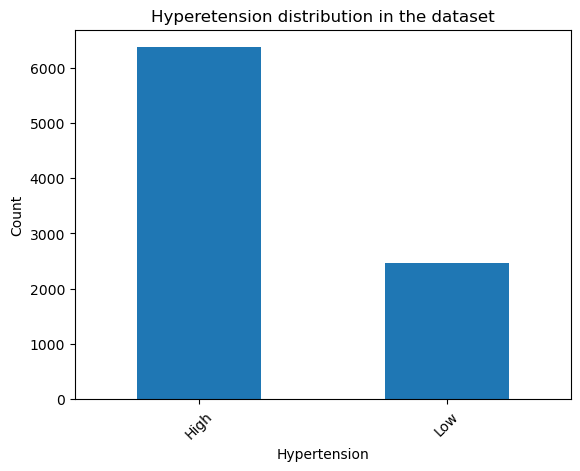

In [51]:
hyp.plot(
    kind = "bar",
    xlabel = "Hypertension",
    ylabel = "Count",
    title = "Hyperetension distribution in the dataset"
)
plt.xticks(rotation=45);

We can see we are dealing with a highly imbalanced dataset when it comes Hypertension.
There is large amount of people with High hypertension

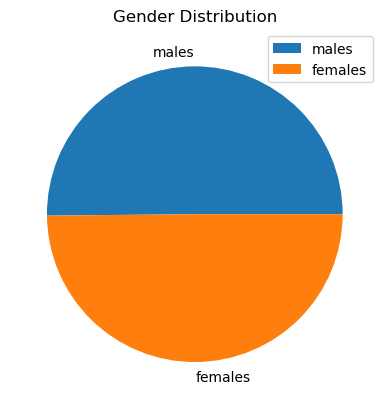

In [56]:
males = (df["Gender"] == 'Male').sum().astype(float)
females = (df["Gender"] == 'Female').sum().astype(float)

gender = np.array([males, females])
plt.pie(gender, labels = ['males','females'])
plt.title("Gender Distribution")
plt.legend()
plt.show()

In [67]:
print(f"males : {round(males/(males + females) * 100, 2)}% \nfemales : {round(females/(males + females) * 100, 2)}%")

males : 50.15% 
females : 49.85%


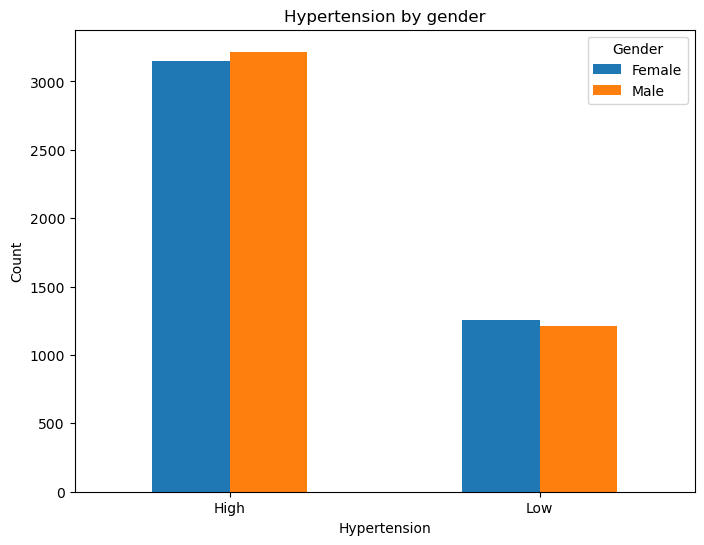

In [74]:
# Hypertension by Gender
grouped = df.groupby(['Hypertension','Gender'])['Age'].count().unstack()
grouped.plot(kind='bar', figsize=(8, 6))
plt.title('Hypertension by gender')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)

plt.show()



There are slightly more males than females 

In [ ]:
## Correlation between numeric variables 
corr = df.select_dtypes("number").corr()
corr

,Age,BMI,Systolic_BP,Diastolic_BP,Heart_Rate
Age,1.000000,0.009314,-0.016896,0.015341,0.005318
BMI,0.009314,1.000000,0.000530,-0.013826,-0.007221
Systolic_BP,-0.016896,0.000530,1.000000,-0.014361,0.004068
Diastolic_BP,0.015341,-0.013826,-0.014361,1.000000,0.003227
Heart_Rate,0.005318,-0.007221,0.004068,0.003227,1.000000


<Axes: >

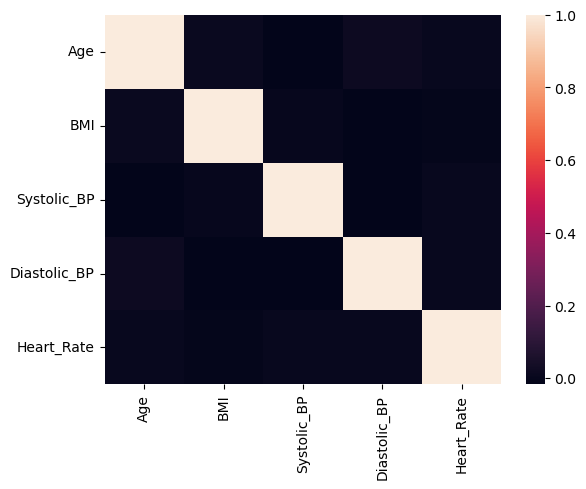

In [71]:
sns.heatmap(corr)

## Building of the model

We can see the data is not highly correlated.

## References

[^note1]: Bisong, E., Jibril, N., Premnath, P., Buligwa, E., Oboh, G., & Chukwuma, A. (2024). Predicting high blood pressure using machine learning models in low- and middle-income countries. BMC Medical Informatics and Decision Making, 24, 234. https://doi.org/10.1186/s12911-024-02634-9